Нуралиев Расим. Группа ПИ19-4

**Вариант 16**

Задание 7. Транспортная задача [1,2 – гл. 6]


Дана транспортная задача: A1, A2, A3 – поставщики с запасами a1, a2, a3 однородного
груза, B1, B2, B3, B4, B5 – потребители с потребностями b1, b2, b3, b4, b5. Матрица тарифов
C = (cij ), где i = 1, 2, 3 и j = 1, 2, 3, 4, 5, содержит стоимости перевозки единицы груза
из пункта Ai в пункт Bj
.
Требуется найти минимальный по стоимости план перевозки груза от поставщиков
к потребителям такой, чтобы был вывезен весь груз и все потребности были удовлетворены.
1. Убедитесь, что транспортная задача закрытого типа.
2. Найдите какой-либо допустимый план перевозки груза (можно использовать методы северо-западного угла, минимальной стоимости или Фогеля).
3. Найдите оптимальный план перевозки груза (план минимальной стоимости) методом потенциалов.
4. Проверьте результаты вычислений на компьютере.


In [4]:
!pip install scipy sympy gurobipy matplotlib

  Using cached matplotlib-3.5.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached kiwisolver-1.4.2-cp310-cp310-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)


You should consider upgrading via the 'C:\Users\a0932\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import pandas as pd
from scipy.optimize import Bounds, linprog
import sympy as sym
import matplotlib.pyplot as plt
from gurobipy import *

In [6]:
# Вариант 16
matrix = """
9 14 6 5 14
3 17 12 13 7
15 10 11 8 21
"""

In [26]:
def parce_input_matrix(matrix):
  mt = matrix.split('\n')
  mt = [i for i in mt if i]
  row1, row2, row3 = mt

  return np.array([list(map(int, row1.split(' '))), list(map(int, row2.split(' '))), list(map(int, row3.split(' ')))])

In [28]:
C = parce_input_matrix(matrix)
C

array([[ 9, 14,  6,  5, 14],
       [ 3, 17, 12, 13,  7],
       [15, 10, 11,  8, 21]])

In [29]:
a1 = 280
a2 = 390
a3 = 250

In [30]:
b1 = 170
b2 = 80
b3 = 240
b4 = 310
b5 = 120

In [31]:
A = np.array([a1, a2, a3])
B = np.array([b1, b2, b3, b4, b5])
df = pd.DataFrame(C, columns=B, index=A)
df.columns.name = 'aᵢ \\ bⱼ'
df


aᵢ \ bⱼ,170,80,240,310,120
280,9,14,6,5,14
390,3,17,12,13,7
250,15,10,11,8,21


In [32]:
if sum(A) == sum(B):
    print('Задача закрытого типа')
else:
    print('Задача открытого типа')

Задача закрытого типа


In [38]:
N = len(A)
M = len(B)
P = np.zeros_like(C)
INF = 1_000_000_007
C_ = C.copy()
A_ = A.copy()
B_ = B.copy()
i = 0
j = 0
while not np.all(C_ == INF):
    i, j = np.unravel_index(C_.argmin(), C_.shape)
    P[i][j] = min(A_[i], B_[j])
    if A_[i] <= B_[j]:
        C_[i].fill(INF)
        B_[j] -= A_[i]
        A_[i] = 0
    else:
        C_[:, j].fill(INF)
        A_[i] -= B[j]
        B_[j] = 0    
if np.count_nonzero(P) == N + M - 1:
    print('Опорный план является невырожденным')
else:
    print('Опорный план является вырожденным')

F = 0
for i in range(N):
    for j in range(M):
        F += C[i][j] * P[i][j]
print('Полученный план перевозки груза:\n')
print(P,'\n')
print('Значение целевой функции для этого опорного плана F =', F)

Опорный план является вырожденным
Полученный план перевозки груза:

[[  0   0   0 280   0]
 [170   0 100   0 120]
 [  0 -60   0  30   0]] 

Значение целевой функции для этого опорного плана F = 3590


In [48]:
A_ub = np.array([[1 if i in range(j*M, M*(j+1)) else 0 for i in range(N*M)] for j in range(N)])
b_ub = A
b_eq = B
A_eq = np.array([[1 if i % M == j else 0 for i in range(N*M)] for j in range(M)])

res = linprog(C.flatten(), A_ub, b_ub, A_eq, b_eq, options={'disp': True})

X = res.x.round(3).reshape(N, M)
F_min = res.fun.round(3)

print('Оптимальный план перевозки груза X*:\n')
print(X, '\n')
print('Оптимальная стоимость перевозки (минимальная):\nF_min = F(X*) =', F_min)

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 165.0               
0.177421121087      0.177421121087      0.177421121087      0.8313789061773  0.177421121087      732.1689178409      
0.03714875418581    0.03714875418581    0.0371487541858     0.8061538917504  0.03714875418568    2260.761942877      
0.006391793646062   0.006391793646045   0.006391793646046   0.8371134764847  0.006391793646105   4639.226167906      
0.00018223195846    0.0001822319584601  0.0001822319584594  0.9767922195898  0.0001822319586976  6185.482496217      
2.216016241084e-08  2.216016234665e-08  2.216016166284e-08  0.9998787905402  2.216016157229e-08  6249.991932214      
1.108017142741e-12  1.108022027768e-12  1.108617882903e-12  0.9999499993632  1.10857471693e-12   6249.999999597      
Optimization terminated successfully.
         Current fu

C:\Users\a0932\AppData\Local\Temp\ipykernel_16132\1193382566.py:6: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  res = linprog(C.flatten(), A_ub, b_ub, A_eq, b_eq, options={'disp': True})
C:\Users\a0932\AppData\Local\Temp\ipykernel_16132\1193382566.py:6: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  res = linprog(C.flatten(), A_ub, b_ub, A_eq, b_eq, options={'disp': True})
c:\Users\a0932\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=6.95375e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_

In [51]:
import seaborn as sns

In [50]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


You should consider upgrading via the 'C:\Users\a0932\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [47]:
res.x.round(3).reshape(N, M)

array([[  0.,   0., 140., 140.,   0.],
       [170.,   0., 100.,   0., 120.],
       [  0.,  80.,   0., 170.,   0.]])

<AxesSubplot:>

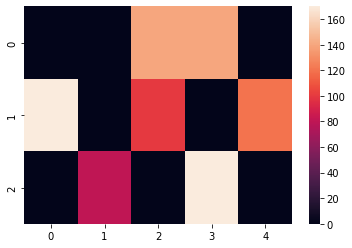

In [52]:
sns.heatmap(X)